In [47]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dateutil
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [41]:
data_311 = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")


/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data_311 = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")
com_health = pd.read_csv("/home/ec2-user/data/community_health.csv")
demographics = pd.read_csv("/home/ec2-user/data/demographics.csv")
food_est = pd.read_csv("/home/ec2-user/data/food_establishment_inspections.csv", engine='python')
food_venues = pd.read_csv("/home/ec2-user/data/food_venues.csv", encoding = 'latin1')
geo = pd.read_csv("/home/ec2-user/data/geographic.csv")
#data_311.head()
#data_311.complaint_type.unique()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
demo_city = pd.read_csv("/home/ec2-user/data/demographics_city.csv")

In [4]:
data_311.head()

,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,city,status,due_date,resolution_date,community_board,borough,latitude,longitude
0,28272192,06/16/2014 09:34:00 AM,06/16/2014 12:00:00 PM,DSNY,BCC - Brooklyn South,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11232,218 31 STREET,31 STREET,BROOKLYN,Closed,NaN,06/16/2014 12:00:00 PM,07 BROOKLYN,BROOKLYN,40.656066,-73.999805
1,28272281,06/16/2014 08:21:00 AM,06/16/2014 12:00:00 PM,DSNY,BCC - Brooklyn South,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11234,5207 AVENUE T,AVENUE T,BROOKLYN,Closed,NaN,06/16/2014 12:00:00 PM,18 BROOKLYN,BROOKLYN,40.611781,-73.923889
2,28272228,06/16/2014 12:00:00 AM,07/15/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11209,230 94 STREET,94 STREET,BROOKLYN,Closed,07/16/2014 12:13:55 PM,07/15/2014 12:00:00 AM,10 BROOKLYN,BROOKLYN,40.618345,-74.034990
3,28272229,06/16/2014 12:00:00 AM,07/01/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11215,NaN,NaN,BROOKLYN,Closed,07/16/2014 02:30:53 PM,07/01/2014 12:00:00 AM,06 BROOKLYN,BROOKLYN,40.662800,-73.978348
4,28272230,06/16/2014 12:00:00 AM,04/28/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10002,174 ORCHARD STREET,ORCHARD STREET,NEW YORK,Pending,07/16/2014 11:05:03 PM,04/28/2014 12:00:00 AM,03 MANHATTAN,MANHATTAN,40.721688,-73.988391


In [6]:
data_311.complaint_type.unique()

array(['Sanitation Condition', 'Rodent', 'Food Poisoning',
       'Food Establishment', 'Dirty Conditions', 'Indoor Air Quality',
       'Smoking', 'Asbestos', 'Drinking Water', 'Mold', 'Drinking',
       'Water System', 'Calorie Labeling', 'Hazardous Materials',
       'Water Quality', 'Air Quality', 'Trans Fat', 'Annual Inspection',
       'Damaged or Dead Tree', 'Animal', 'Injured Wildlife',
       'Homebound Evacuation 4', 'Illegal Animal - Sold/Kept',
       'DORIS Literature Request', 'General Question',
       'BBQ Outside Authorized Area', 'Annual/ Cycle Inspection',
       'Animal Waste', 'Healthcare Facilities', 'MOLD', 'Baby Formula',
       'Illegal Pet - Sold/Kept', 'Hazardous Conditions',
       'Graffiti or Vandalism', 'Grass/Weeds', 'Garbage or Litter',
       'Employee Behavior', 'Health and Safety',
       'Killing/Trapping Pigeon', 'CFC Recovery',
       'DOHMH Literature Request', 'Animal unsanitary condition',
       'Biking/Rollerblading Off Path', 'Health'], dtyp

In [27]:
new_data_311 = data_311[['created_date', 'closed_date', 'agency_name', 'complaint_type', 'descriptor', 'location_type', 'due_date','resolution_date', 'borough', 'latitude', 'longitude']]
# new_data_311.groupby(['complaint_type']).agg('count').head()

In [28]:
dirty_conditions_311 = new_data_311.loc[data_311['complaint_type'] == 'Dirty Conditions']
dirty_conditions_311.head()

,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,due_date,resolution_date,borough,latitude,longitude
16,06/16/2014 08:00:00 AM,06/17/2014 12:00:00 PM,A - Bronx,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/17/2014 12:00:00 PM,BRONX,40.835702,-73.851299
18,06/16/2014 07:45:00 PM,06/18/2014 12:00:00 PM,A - Queens,Dirty Conditions,E3A Dirty Area/Alleyway,Lot,NaN,06/18/2014 12:00:00 PM,QUEENS,40.717503,-73.779887
19,06/16/2014 11:51:00 AM,06/19/2014 12:00:00 PM,A - Manhattan,Dirty Conditions,E11 Litter Surveillance,Sidewalk,NaN,06/19/2014 12:00:00 PM,MANHATTAN,40.754317,-73.986865
21,06/16/2014 02:56:00 AM,06/16/2014 12:00:00 PM,A - Bronx,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/16/2014 12:00:00 PM,BRONX,40.825599,-73.877536
23,06/16/2014 03:59:00 PM,06/21/2014 12:00:00 PM,A - Queens,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/21/2014 12:00:00 PM,QUEENS,40.740572,-73.879294


In [29]:
dirty_conditions_311['date'] = dirty_conditions_311['created_date'].str[0:10]
dirty_conditions_311.head()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,due_date,resolution_date,borough,latitude,longitude,date
16,06/16/2014 08:00:00 AM,06/17/2014 12:00:00 PM,A - Bronx,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/17/2014 12:00:00 PM,BRONX,40.835702,-73.851299,06/16/2014
18,06/16/2014 07:45:00 PM,06/18/2014 12:00:00 PM,A - Queens,Dirty Conditions,E3A Dirty Area/Alleyway,Lot,NaN,06/18/2014 12:00:00 PM,QUEENS,40.717503,-73.779887,06/16/2014
19,06/16/2014 11:51:00 AM,06/19/2014 12:00:00 PM,A - Manhattan,Dirty Conditions,E11 Litter Surveillance,Sidewalk,NaN,06/19/2014 12:00:00 PM,MANHATTAN,40.754317,-73.986865,06/16/2014
21,06/16/2014 02:56:00 AM,06/16/2014 12:00:00 PM,A - Bronx,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/16/2014 12:00:00 PM,BRONX,40.825599,-73.877536,06/16/2014
23,06/16/2014 03:59:00 PM,06/21/2014 12:00:00 PM,A - Queens,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,NaN,06/21/2014 12:00:00 PM,QUEENS,40.740572,-73.879294,06/16/2014


/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


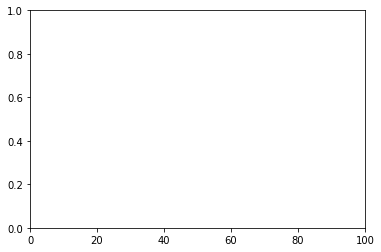

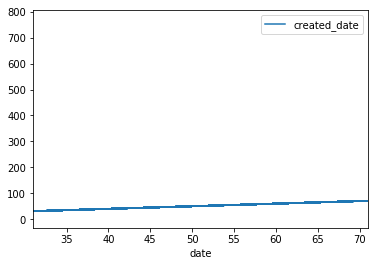

In [41]:

date_times = pd.to_datetime(dirty_conditions_311['date'], format='%m/%d/%Y')
dirty_conditions_311['date_time'] = date_times
dirty_conditions_311_dt = dirty_conditions_311.sort_values('date', ascending=True)
dirty_conditions_311_dt_group = dirty_conditions_311.groupby(['date_time']).agg('count')
dirty_conditions_311_dt_group.reset_index().plot(x='date', y='created_date')

In [48]:
dirty_conditions_311_dt_group.reset_index().head()

,date_time,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,due_date,resolution_date,borough,latitude,longitude,date
0,2010-01-01,31,31,31,31,31,31,0,31,31,31,31,31
1,2010-01-02,35,35,35,35,35,35,0,35,35,35,35,35
2,2010-01-03,23,23,23,23,23,23,0,23,23,22,22,23
3,2010-01-04,81,81,81,81,81,81,0,81,81,79,79,81
4,2010-01-05,105,105,105,105,105,105,0,105,105,102,102,105


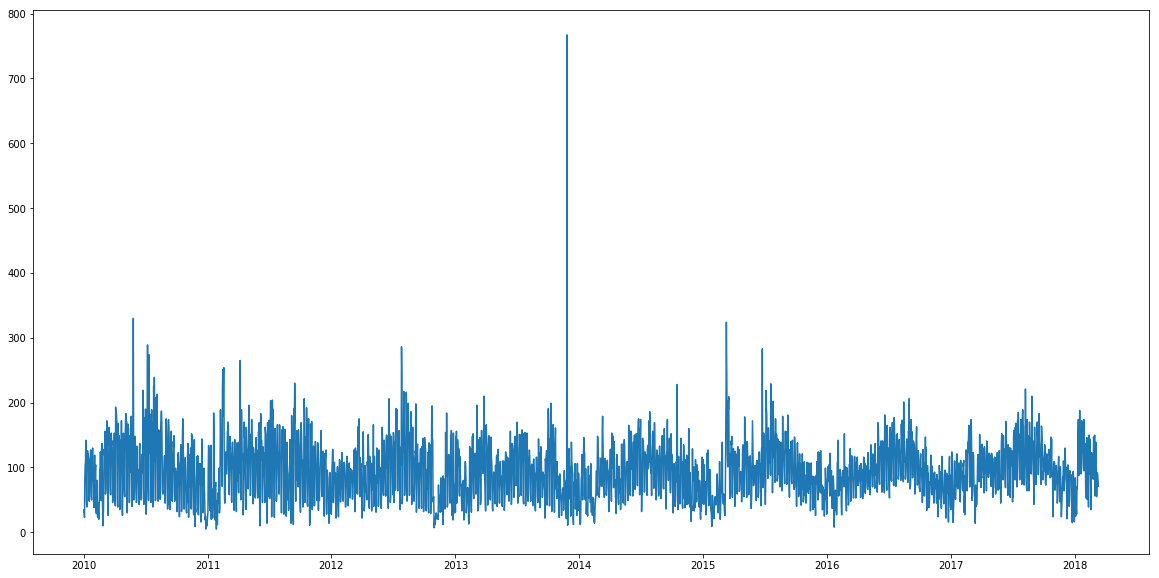

In [47]:
plt.figure(figsize=(20,10))
plt.plot(_44["date_time"], _44["created_date"])

In [122]:
data_311 = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")


/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
data_311['date'] = data_311['created_date'].str[0:10]
date_times = pd.to_datetime(data_311['date'], format='%m/%d/%Y')
data_311['date_times'] = date_times
data_311 = data_311.sort_values('date', ascending=True)
data_311['month_year'] = data_311.date_times.dt.to_period('M')

In [124]:
data_311.head()

,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,status,due_date,resolution_date,community_board,borough,latitude,longitude,date,date_times,month_year
772226,15635842,01/01/2010 01:05:00 PM,01/02/2010 11:35:00 AM,DEP,Department of Environmental Protection,Water System,Hydrant Running Full (WA4),NaN,NaN,NaN,...,Closed,01/02/1900 12:00:00 AM,01/02/2010 11:35:00 AM,Unspecified BRONX,BRONX,NaN,NaN,01/01/2010,2010-01-01,2010-01
1043309,15654999,01/01/2010 07:48:00 PM,01/04/2010 12:00:00 PM,DSNY,Brooklyn South 10,Dirty Conditions,E2 Receptacle Violation,Sidewalk,11228,636 92 STREET,...,Closed,NaN,01/04/2010 12:00:00 AM,10 BROOKLYN,BROOKLYN,40.615792,-74.025235,01/01/2010,2010-01-01,2010-01
1042834,15633038,01/01/2010 10:35:38 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10025,NaN,...,Pending,01/15/2010 10:35:38 AM,01/15/2010 12:00:00 AM,07 MANHATTAN,MANHATTAN,40.802928,-73.967575,01/01/2010,2010-01-01,2010-01
384678,15635920,01/01/2010 12:26:00 PM,01/04/2010 02:20:00 PM,DEP,Department of Environmental Protection,Water System,Defective Street Cut (WZZ1),NaN,10002,207 BOWERY,...,Closed,01/02/1900 12:00:00 AM,01/04/2010 02:20:00 PM,03 MANHATTAN,MANHATTAN,40.721364,-73.993618,01/01/2010,2010-01-01,2010-01
384677,15635856,01/01/2010 04:18:00 PM,01/25/2010 08:05:00 AM,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,NaN,NaN,...,Closed,NaN,01/25/2010 08:05:00 AM,Unspecified STATEN ISLAND,STATEN ISLAND,NaN,NaN,01/01/2010,2010-01-01,2010-01


In [125]:
def create_table(table_311, complaint):
    complaint_table = table_311.loc[data_311['complaint_type'] == complaint]
    complaint_table = complaint_table.groupby(['date_times']).agg('count')
    complaint_table = complaint_table.reset_index().head()
    return complaint_table

In [126]:
x = create_table(data_311, 'Dirty Conditions')

In [127]:
x.head()

,date_times,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,...,city,status,due_date,resolution_date,community_board,borough,latitude,longitude,date,month_year
0,2010-01-01,31,31,31,31,31,31,31,31,31,...,31,31,0,31,31,31,31,31,31,31
1,2010-01-02,35,35,35,35,35,35,35,35,35,...,35,35,0,35,35,35,35,35,35,35
2,2010-01-03,23,23,23,23,23,23,23,23,22,...,22,23,0,23,23,23,22,22,23,23
3,2010-01-04,81,81,81,81,81,81,81,81,79,...,79,81,0,81,81,81,79,79,81,81
4,2010-01-05,105,105,105,105,105,105,105,105,102,...,102,105,0,105,105,105,102,102,105,105


In [103]:
# x["month"] = pd.to_datetime(x["month_year"], format='%Y-%m')
# x.head()

In [102]:
# x["month_string"] = str(x["month_year"])
# x.head()

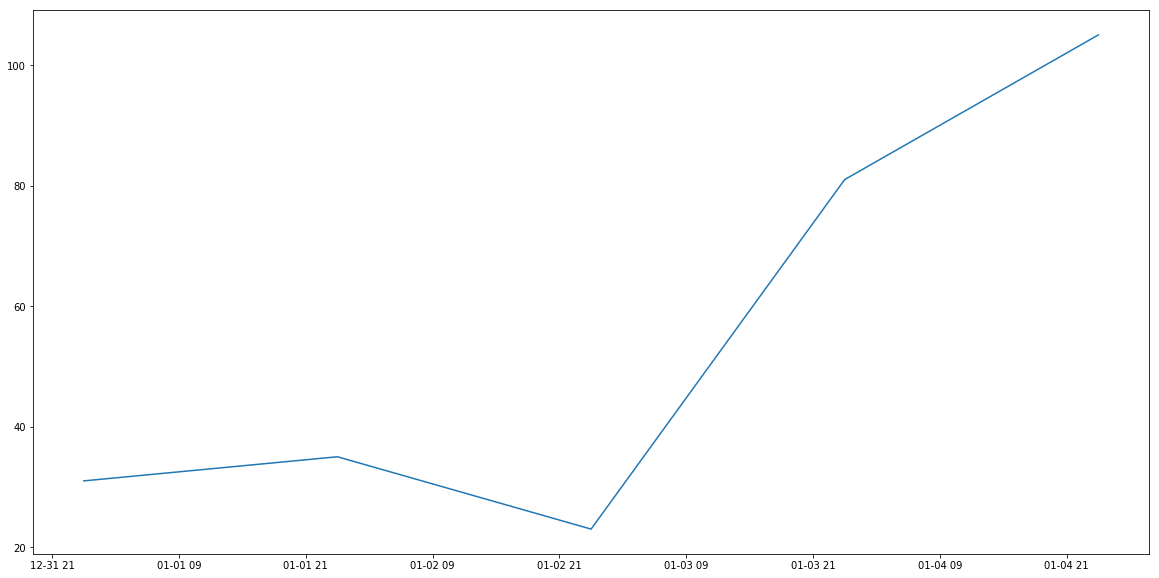

In [128]:
plt.figure(figsize=(20,10))
plt.plot(x["date_times"], x["created_date"])

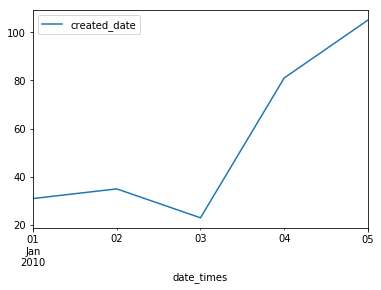

In [130]:
x.reset_index().plot(x='date_times', y='created_date')

In [108]:
x.dtypes

month_year          object
unique_key           int64
created_date         int64
closed_date          int64
agency_acronym       int64
agency_name          int64
complaint_type       int64
descriptor           int64
location_type        int64
incident_zip         int64
incident_address     int64
street_name          int64
city                 int64
status               int64
due_date             int64
resolution_date      int64
community_board      int64
borough              int64
latitude             int64
longitude            int64
date                 int64
date_times           int64
dtype: object

In [131]:
data_311 = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
filtered_data_311 = data_311[['created_date_dt', 'closed_date_dt', 'complaint_type', 'due_date_dt','resolution_date_dt', 'latitude', 'longitude']]

In [142]:
data_311['created_date'] = data_311['created_date'].str[0:10] #gets rid of time of day
data_311['created_date_dt'] = pd.to_datetime(data_311['created_date'], format='%m/%d/%Y') #creates datetime object of created date
data_311['closed_date'] = data_311['closed_date'].str[0:10] #gets rid of time of day
data_311['closed_date_dt'] = pd.to_datetime(data_311['closed_date'], format='%m/%d/%Y')
data_311['due_date'] = data_311['due_date'].str[0:10] #gets rid of time of day
data_311['due_date_dt'] = pd.to_datetime(data_311['due_date'], format='%m/%d/%Y')
data_311['resolution_date'] = data_311['resolution_date'].str[0:10] #gets rid of time of day
data_311['resolution_date_dt'] = pd.to_datetime(data_311['resolution_date'], format='%m/%d/%Y')

data_311 = data_311.sort_values('created_date_dt', ascending=True) #sorts by date of request
#data_311['month_year'] = data_311.created_date.dt.to_period('M') #changes to month-year instead of month-date-year doesnt work.

In [145]:
filtered_data_311.head()

,created_date_dt,closed_date_dt,complaint_type,due_date_dt,resolution_date_dt,latitude,longitude
1042881,2010-01-01,2010-01-05,Dirty Conditions,NaT,2010-01-05,40.822868,-73.944228
1042878,2010-01-01,2010-01-05,Dirty Conditions,NaT,2010-01-05,40.689921,-73.950906
669471,2010-01-01,2010-01-02,Water System,1900-01-02,2010-01-02,40.747678,-73.902462
669464,2010-01-01,2010-01-20,Water System,NaT,2010-01-20,40.635500,-74.090276
669472,2010-01-01,2010-01-04,Air Quality,NaT,2010-01-04,40.719680,-73.845930


In [148]:
complaint_table2 = data_311.loc[data_311['complaint_type'] == 'Dirty Conditions']
complaint_table2 = complaint_table2.groupby(['created_date_dt']).agg('count')
complaint_table2 = complaint_table2.reset_index().head()

In [149]:
complaint_table2

,created_date_dt,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,...,status,due_date,resolution_date,community_board,borough,latitude,longitude,closed_date_dt,resolution_date_dt,due_date_dt
0,2010-01-01,31,31,31,31,31,31,31,31,31,...,31,0,31,31,31,31,31,31,31,0
1,2010-01-02,35,35,35,35,35,35,35,35,35,...,35,0,35,35,35,35,35,35,35,0
2,2010-01-03,23,23,23,23,23,23,23,23,22,...,23,0,23,23,23,22,22,23,23,0
3,2010-01-04,81,81,81,81,81,81,81,81,79,...,81,0,81,81,81,79,79,81,81,0
4,2010-01-05,105,105,105,105,105,105,105,105,102,...,105,0,105,105,105,102,102,105,105,0


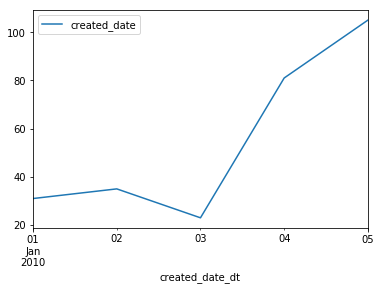

In [153]:
complaint_table2.reset_index().plot(x='created_date_dt', y='created_date')

In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [2]:
requests = pd.read_csv("/home/ec2-user/data/311_service_requests.csv")
venues = pd.read_csv("/home/ec2-user/data/food_venues.csv", encoding='latin1')
demographics = pd.read_csv("/home/ec2-user/data/demographics.csv")
demographics_city = pd.read_csv("/home/ec2-user/data/demographics_city.csv")
health = pd.read_csv("/home/ec2-user/data/community_health.csv")
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_lat = nyc.to_crs({'init': 'epsg:4326'})
nta_map = pd.read_csv("/home/ec2-user/data/requests_labeled.csv")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
nta_map = pd.read_csv("/home/ec2-user/data/requests_labeled.csv")

In [3]:
requests_with_nta = requests[["unique_key", "created_date", "closed_date", "complaint_type", "resolution_date", "due_date"]].merge(nta_map, on="unique_key", how="inner")

In [4]:
requests_with_nta["datetime"] = pd.to_datetime(requests_with_nta["created_date"].str[0:10], format="%m/%d/%Y")

In [5]:
requests_nta_month = requests_with_nta.groupby(["nta_code", requests_with_nta["datetime"].dt.strftime("%m-%Y")]).count()

In [6]:
requests_nta_month.drop('datetime',axis = 1, inplace = True)

In [7]:
requests_nta_month_reset = requests_nta_month.reset_index()

In [8]:
requests_nta_month_reset.head()

,nta_code,datetime,unique_key,created_date,closed_date,complaint_type,resolution_date,due_date
0,BK09,01-2010,30,30,26,30,30,9
1,BK09,01-2011,16,16,10,16,16,11
2,BK09,01-2012,50,50,47,50,50,8
3,BK09,01-2013,33,33,30,33,33,10
4,BK09,01-2014,22,22,20,22,22,5


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


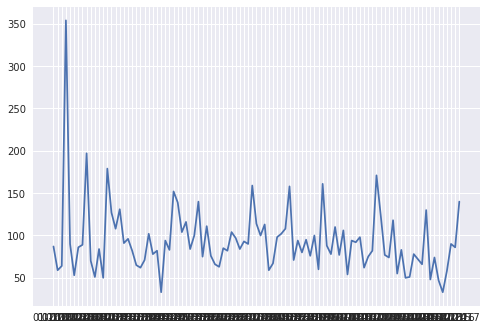

In [9]:
plt.plot(requests_nta_month_reset[requests_nta_month_reset["nta_code"]=="SI54"]['datetime'], requests_nta_month_reset[requests_nta_month_reset["nta_code"]=="SI54"]['unique_key'])

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


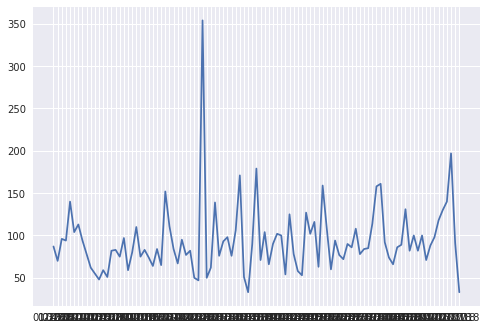

In [55]:
plt.plot(requests_nta_month_reset[requests_nta_month_reset["nta_code"]=="SI54"]['datetime'], requests_nta_month_reset[requests_nta_month_reset["nta_code"]=="SI54"]['unique_key'])

In [56]:
def nta_graph_timeline(df, nta, metric):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    ax.set_facecolor("white")
    ax.grid(True)
    plt.title(nta + " Service Calls Over Time")
    plt.xlabel("Year")
    plt.ylabel("Total 311 Service Calls per Month")
    plt.plot(df[df["nta_code"]==nta]['datertime'], df[df["nta_code"]==nta][metric])

In [38]:
requests_nta_month_reset["datertime"] = pd.to_datetime(requests_nta_month_reset["datetime"], format='%m-%Y')

In [41]:
requests_nta_month_reset.sort_values("datertime", inplace=True)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


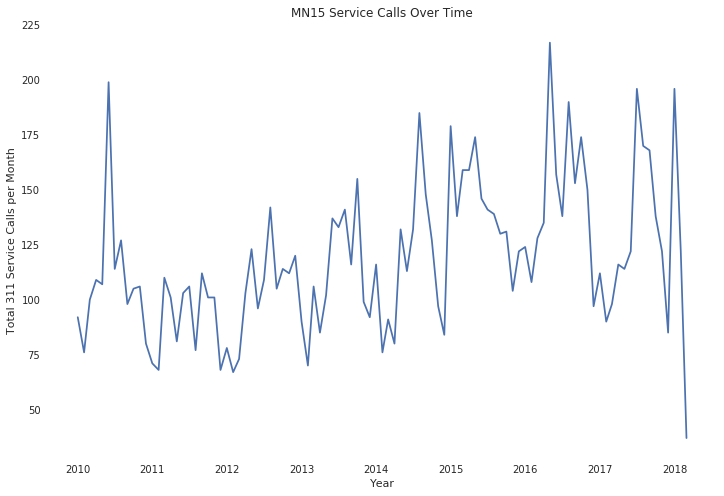

In [73]:
nta_graph_timeline(requests_nta_month_reset, "MN15", "unique_key")

In [151]:
def get_fft(df, nta, metric):
    data = df[df["nta_code"]==nta][metric]
    mean = data.mean()
    f = np.fft.fft(data-mean, n = 100, norm="ortho")
    return f

In [152]:
from sklearn.decomposition import PCA

In [153]:
transforms = {}
for index, code in requests_nta_month_reset["nta_code"].iteritems():
    f = get_fft(requests_nta_month_reset, code, "unique_key")
    transforms[code] = f

In [160]:
all_data = np.vstack(list(transforms.values()))

In [159]:
_158.shape

(177, 100)

In [179]:
list(transforms.keys())

['BK09',
 'BX09',
 'MN34',
 'QN52',
 'QN28',
 'BX29',
 'SI36',
 'BK41',
 'QN19',
 'BK88',
 'QN71',
 'QN44',
 'BK27',
 'SI07',
 'MN24',
 'BX44',
 'BX13',
 'BX28',
 'BX63',
 'BX40',
 'QN37',
 'BK42',
 'QN43',
 'BK60',
 'MN12',
 'QN62',
 'SI54',
 'QN45',
 'MN36',
 'QN70',
 'MN22',
 'BX08',
 'BX46',
 'BX30',
 'BX39',
 'SI08',
 'MN40',
 'BK78',
 'BK40',
 'BK61',
 'BX59',
 'QN25',
 'MN31',
 'BK96',
 'QN49',
 'SI25',
 'BK73',
 'BK31',
 'QN35',
 'QN56',
 'QN34',
 'MN33',
 'QN72',
 'QN42',
 'BX41',
 'BX26',
 'SI48',
 'SI35',
 'QN06',
 'QN08',
 'BK44',
 'SI01',
 'BX17',
 'QN27',
 'BK29',
 'QN61',
 'BX43',
 'QN41',
 'QN76',
 'BX22',
 'MN23',
 'MN06',
 'BK76',
 'QN01',
 'BK45',
 'BX62',
 'BK58',
 'QN50',
 'MN13',
 'BX14',
 'BK30',
 'BK77',
 'BK28',
 'QN15',
 'QN60',
 'BK95',
 'BK90',
 'MN20',
 'MN17',
 'QN20',
 'BK19',
 'SI05',
 'BK21',
 'BK43',
 'SI32',
 'BK75',
 'QN26',
 'QN51',
 'QN38',
 'QN03',
 'BK46',
 'BX27',
 'MN14',
 'QN10',
 'MN50',
 'QN46',
 'BX49',
 'BK35',
 'SI37',
 'QN55',
 'MN35',
 

In [161]:
pca = PCA(n_components=2)
pca.fit(all_data)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [167]:
pca.explained_variance_ratio_
all_data_transformed = pca.transform(all_data)

In [125]:
np.concatenate(list(transforms.values())).reshape(99,)

ValueError: cannot reshape array of size 17362 into shape (99,)

In [182]:
all_data_labeled= {}
for x, y in zip(list(transforms.keys()), all_data_transformed):
    all_data_labeled[x] = y

In [183]:
all_data_labeled

{'BK09': array([-96.01774766+2.39821783e-14j,  41.2969129 -2.62374063e-14j]),
 'BK17': array([-91.60639459+1.64439567e-13j, -48.43272904+1.10578773e-13j]),
 'BK19': array([-68.88134443+9.89271817e-14j,  33.66726854-7.52307818e-14j]),
 'BK21': array([-61.79745133+1.47968944e-14j,  28.07308651-1.09178191e-14j]),
 'BK23': array([-93.79152876+8.51224426e-15j,  33.87306763+8.71897915e-15j]),
 'BK25': array([-77.40387612+9.29589721e-14j,  25.35494519-2.88759286e-14j]),
 'BK26': array([-90.4068342 +4.69204080e-14j,  33.61023006-3.56252666e-14j]),
 'BK27': array([-86.7771125 +7.01262357e-14j,   8.53031328+5.17960068e-16j]),
 'BK28': array([ 28.82499771-1.34937489e-14j, -41.34635044+3.63299377e-14j]),
 'BK29': array([-78.12482534+8.59889525e-14j,  38.44979909-5.04282510e-14j]),
 'BK30': array([-117.37741491+8.50770308e-14j,   19.30802524+3.64846307e-14j]),
 'BK31': array([-131.69181346+2.62353347e-13j,    3.72131548-1.83965392e-14j]),
 'BK32': array([ 42.99199097+2.08713391e-13j, -71.93864457-1

In [189]:
x_values_real_not = []
y_values_real_not = []
x_values_real_yes = []
y_values_real_yes = []
x_values_imag_not = []
y_values_imag_not = []
x_values_imag_yes = []
y_values_imag_yes = []
for nta, vec in all_data_labeled.items():
    if nta in gentrified:
        x_values_real_yes.append(vec[0].real)
        y_values_real_yes.append(vec[1].real)
        x_values_imag_yes.append(vec[0].imag)
        y_values_imag_yes.append(vec[1].imag)
    else:
        x_values_real_not.append(vec[0].real)
        y_values_real_not.append(vec[1].real)
        x_values_imag_not.append(vec[0].imag)
        y_values_imag_not.append(vec[1].imag)
    

In [192]:
arrays = []
for val in all_data_labeled.values():
    new_array = np.array([val[0].real, val[0].imag, val[1].real, val[1].imag])
    arrays.append(new_array)
    
all_arrays = np.array(arrays)

In [193]:
all_arrays.shape

(177, 4)

In [195]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_arrays)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [200]:
x_values_l = []
y_values_l = []
x_values_n = []
y_values_n = []
for vec, label in zip(all_data_labeled.values(), kmeans.labels_):
    print(vec)
    if label:
        x_values_l.append(vec[0])
        y_values_l.append(vec[1])
    else:
        x_values_n.append(vec[0])
        y_values_n.append(vec[1])
        
        

[-96.01774766+2.39821783e-14j  41.2969129 -2.62374063e-14j]
[-89.16117916+8.35747850e-16j  47.60901812-2.59109384e-16j]
[12.29484635+2.61910041e-13j 38.45823488-5.12030937e-14j]
[-93.35396765+2.90382372e-14j  18.96184217-1.23380230e-14j]
[-17.74220713+2.89864674e-13j -42.30651607-7.12821959e-14j]
[-54.68016909-7.15447003e-15j  -0.09926449+4.26711481e-16j]
[-98.68331484+5.30734278e-14j  32.31672326-1.46533742e-15j]
[-74.21272442+3.83748006e-15j  34.15353332-8.58000822e-15j]
[-58.24670946+5.59809289e-14j   8.98516912-2.08911003e-14j]
[ 13.07474866+1.27058770e-14j -60.7707188 +5.47641586e-14j]
[-68.53281572+8.76712536e-15j   7.29995261+3.33033339e-14j]
[-95.21276163+3.61154033e-14j  40.56012194+1.54685065e-14j]
[-86.7771125 +7.01262357e-14j   8.53031328+5.17960068e-16j]
[-38.67565757-6.43569172e-14j 192.33806636-4.59314985e-13j]
[-65.89213945+1.13099196e-13j   7.03038149-3.50035614e-14j]
[125.71154399+2.93804037e-13j -92.28749163-7.17114678e-14j]
[-61.80165923+5.63209516e-14j  26.69807772

In [201]:
x_values_n

[(-96.01774765904618+2.3982178284529268e-14j),
 (-89.16117915935115+8.35747849608129e-16j),
 (12.29484635361655+2.619100408000379e-13j),
 (-93.35396765269789+2.9038237151711625e-14j),
 (-17.742207127537473+2.8986467358326666e-13j),
 (-54.680169089321545-7.15447003364933e-15j),
 (-98.68331484437876+5.307342781054715e-14j),
 (-74.2127244203195+3.837480057800227e-15j),
 (-58.2467094561801+5.598092888957663e-14j),
 (13.07474865843564+1.2705876952561596e-14j),
 (-68.53281571906032+8.767125358722465e-15j),
 (-95.21276162604727+3.611540325427894e-14j),
 (-86.77711250005346+7.012623571386524e-14j),
 (-38.675657571221755-6.435691715186921e-14j),
 (-65.89213944936836+1.1309919589043385e-13j),
 (125.71154398788083+2.938040374385836e-13j),
 (-61.80165923355832+5.6320951632841705e-14j),
 (88.2085883857763+2.5341452868596797e-13j),
 (40.42254215113607+9.09527729020985e-14j),
 (6.2079556362366715+4.528129337719239e-14j),
 (94.46241583924876+1.271506573126913e-13j),
 (-97.61891301753498+4.661286323022

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


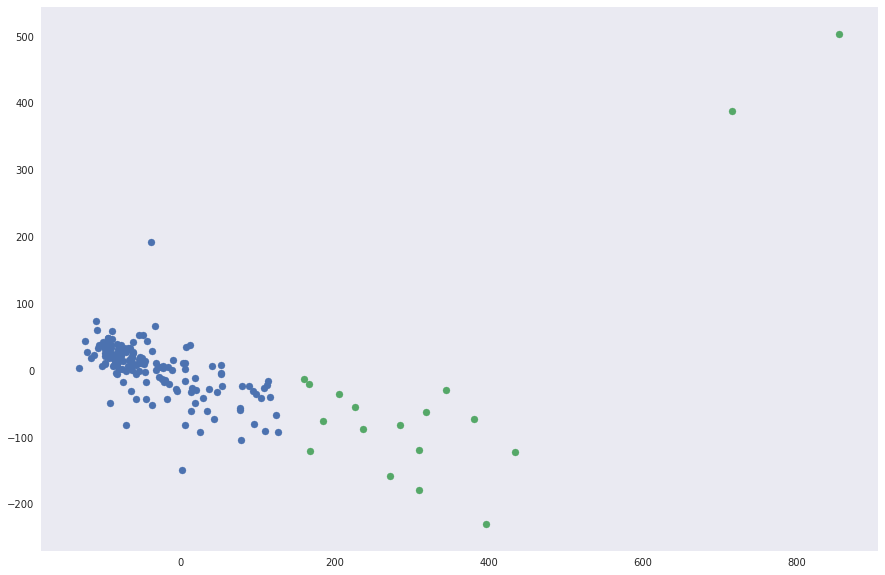

In [206]:
plt.figure(figsize=(15,10))
plt.grid(False)
# plt.xlabel("Year")
# plt.ylabel("Total 311 Service Calls per Month")
plt.scatter(x_values_n, y_values_n)
plt.scatter(x_values_l, y_values_l, cmap="Greens")

In [184]:
gentrified = {"BK81", "BK82", "BK85", "BK93", "BX01", "BX05", "BX07", "BX08", "BX14", "BX27", "BX28", "BX30", "BX33", "BX34", "BX35", "BX40", "BX43", "BX44", "BX59", "BX63", "MN01", "MN06", "MN34", "MN35", "QN61" }

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


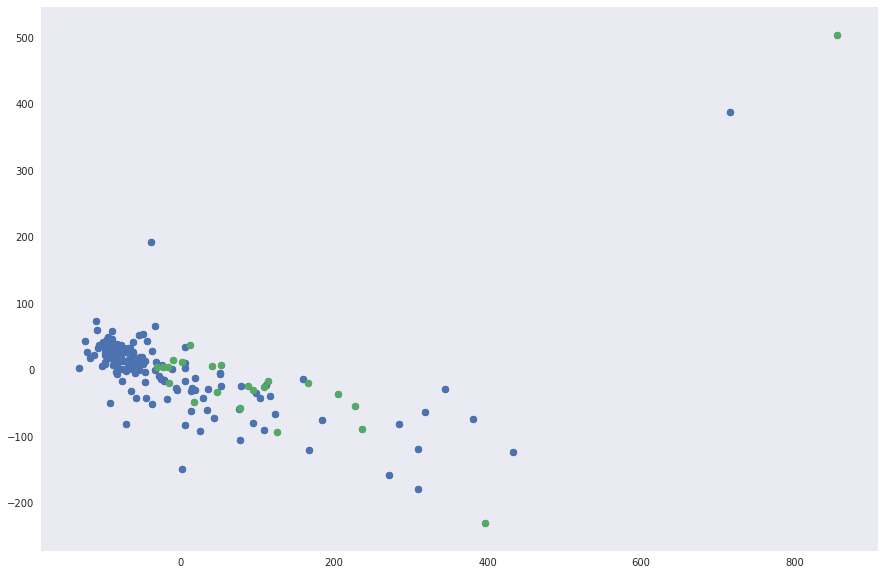

In [204]:
plt.figure(figsize=(15,10))
plt.grid(False)
plt.scatter(x_values_not, y_values_not)
plt.scatter(x_values_yes, y_values_yes, cmap="Greens")

In [187]:
x_values

[(-96.01774765904618+2.3982178284529268e-14j),
 (-89.16117915935115+8.35747849608129e-16j),
 (12.29484635361655+2.619100408000379e-13j),
 (-93.35396765269789+2.9038237151711625e-14j),
 (-17.742207127537473+2.8986467358326666e-13j),
 (-54.680169089321545-7.15447003364933e-15j),
 (-98.68331484437876+5.307342781054715e-14j),
 (-74.2127244203195+3.837480057800227e-15j),
 (-58.2467094561801+5.598092888957663e-14j),
 (13.07474865843564+1.2705876952561596e-14j),
 (-68.53281571906032+8.767125358722465e-15j),
 (-95.21276162604727+3.611540325427894e-14j),
 (-86.77711250005346+7.012623571386524e-14j),
 (-38.675657571221755-6.435691715186921e-14j),
 (-65.89213944936836+1.1309919589043385e-13j),
 (125.71154398788083+2.938040374385836e-13j),
 (-61.80165923355832+5.6320951632841705e-14j),
 (166.19532474244534+2.0087279919716912e-13j),
 (88.2085883857763+2.5341452868596797e-13j),
 (40.42254215113607+9.09527729020985e-14j),
 (6.2079556362366715+4.528129337719239e-14j),
 (94.46241583924876+1.27150657312

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


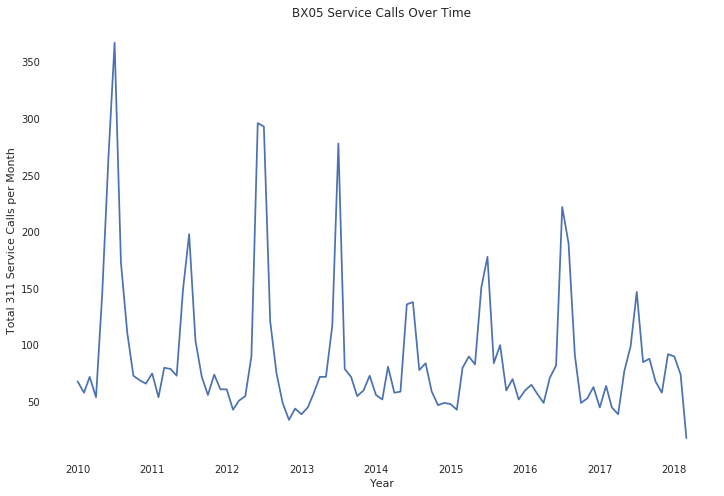

In [94]:
nta_graph_timeline(requests_nta_month_reset, "BX05", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


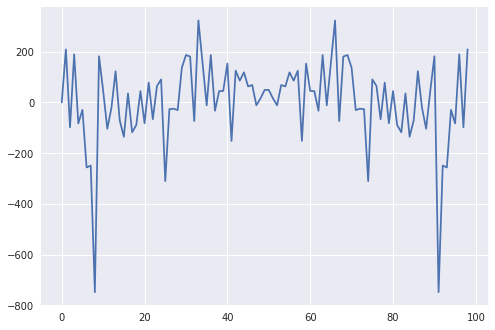

In [95]:
get_fft(requests_nta_month_reset, "BK81", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


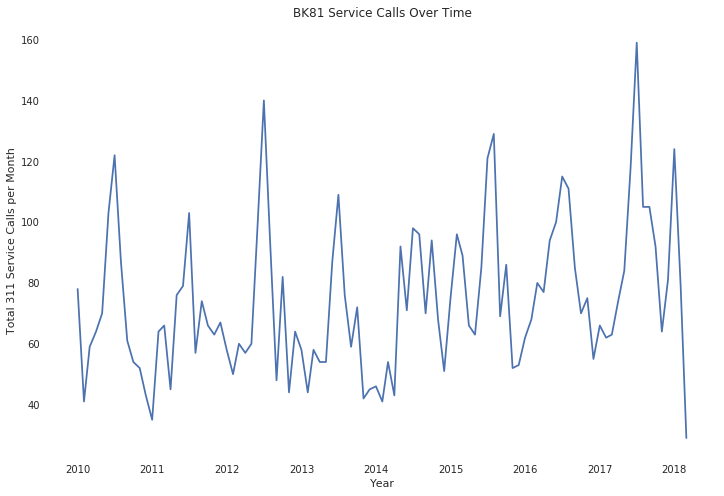

In [59]:
nta_graph_timeline(requests_nta_month_reset, "BK81", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


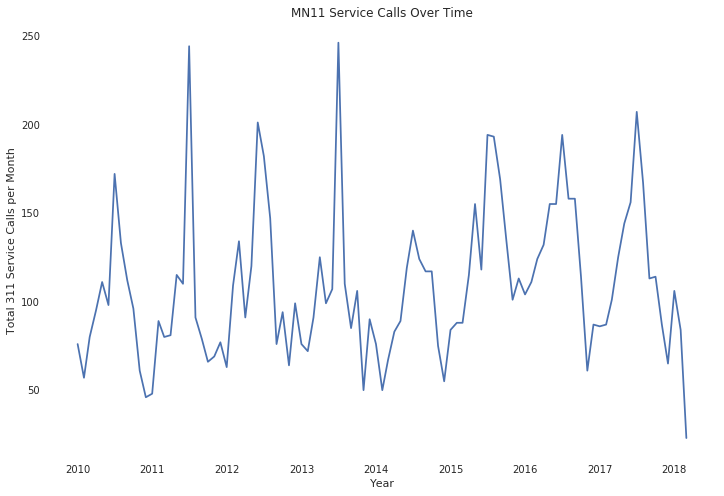

In [60]:
nta_graph_timeline(requests_nta_month_reset, "MN11", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


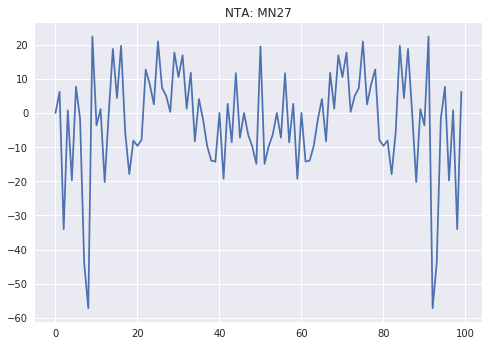

In [211]:
plt.title("NTA: MN27")
plt.plot(get_fft(requests_nta_month_reset, "MN27", "unique_key"))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


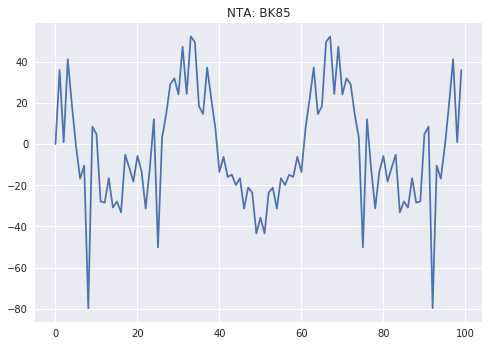

In [209]:
plt.title("NTA: BK85")
plt.plot(get_fft(requests_nta_month_reset, "BK85", "unique_key"))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


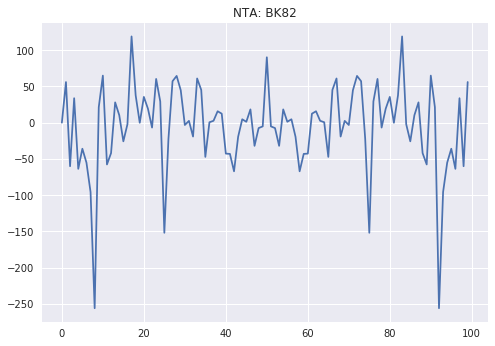

In [210]:
plt.title("NTA: BK82")
plt.plot(get_fft(requests_nta_month_reset, "BK82", "unique_key"))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


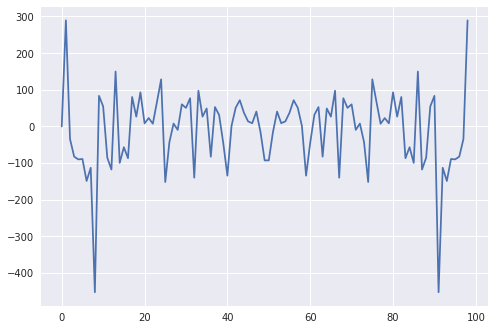

In [142]:
plt.plot(get_fft(requests_nta_month_reset, "BX01", "unique_key"))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


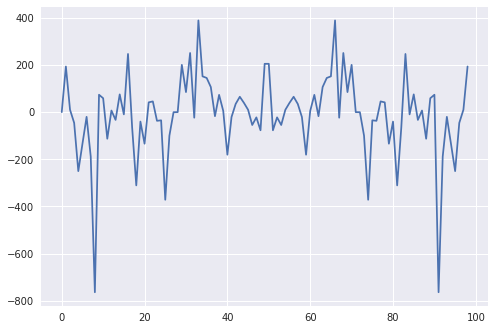

In [144]:
plt.plot(get_fft(requests_nta_month_reset, "BX03", "unique_key"))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


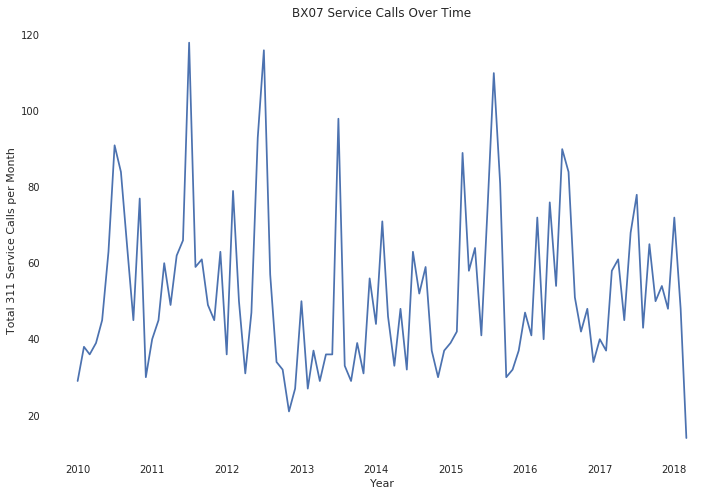

In [63]:
nta_graph_timeline(requests_nta_month_reset, "BX07", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


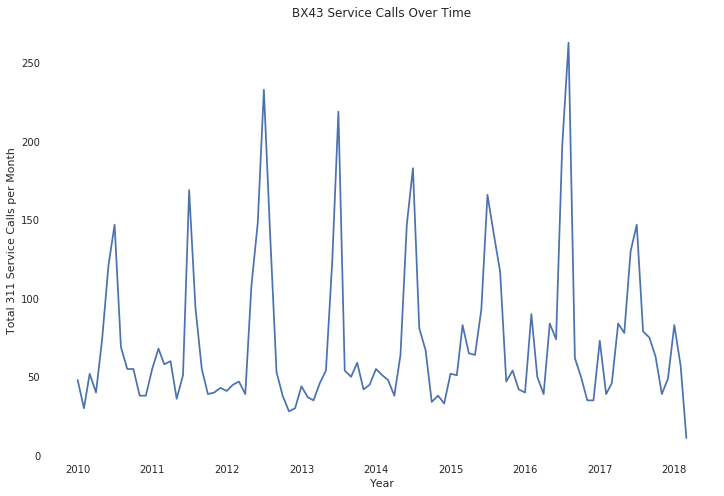

In [145]:
nta_graph_timeline(requests_nta_month_reset, "BX43", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


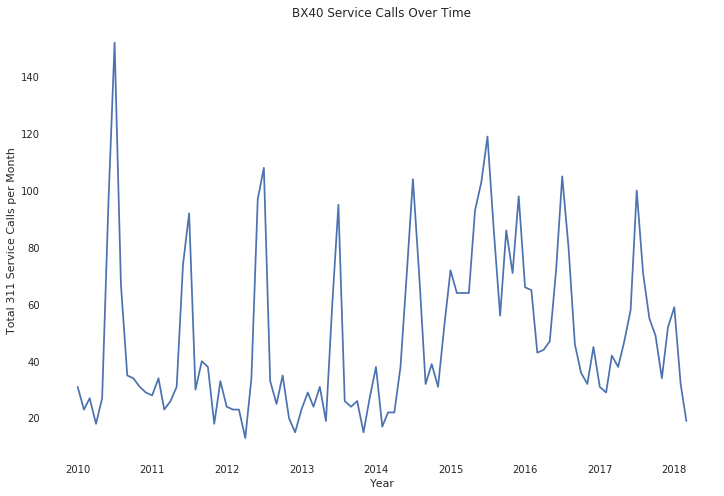

In [146]:
nta_graph_timeline(requests_nta_month_reset, "BX40", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


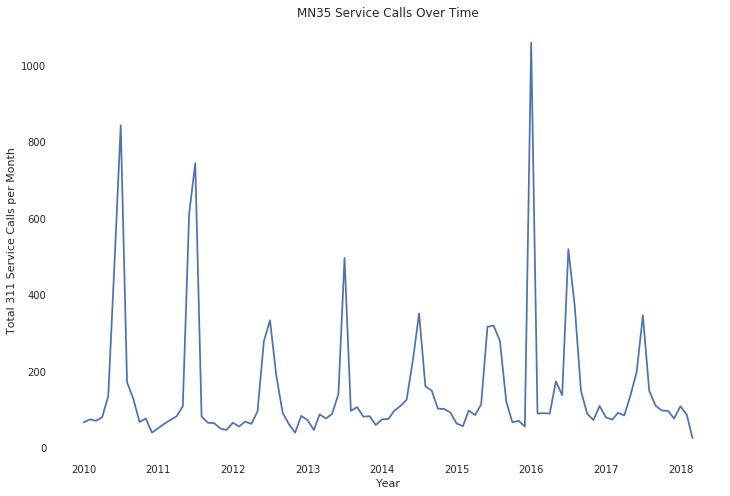

In [147]:
nta_graph_timeline(requests_nta_month_reset, "MN35", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


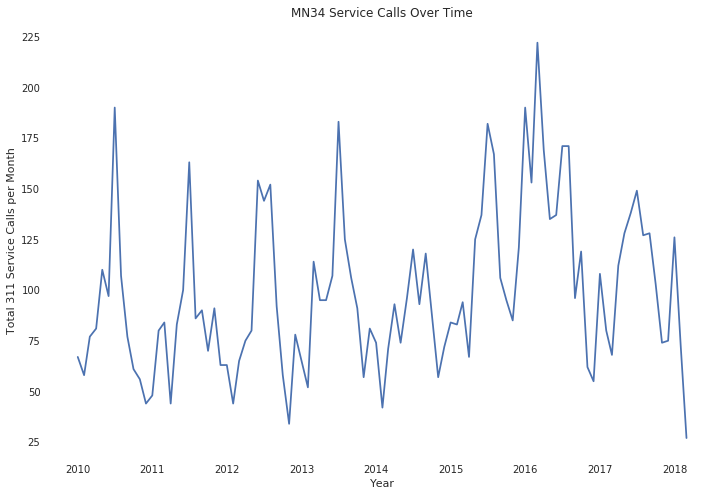

In [148]:
nta_graph_timeline(requests_nta_month_reset, "MN34", "unique_key")

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


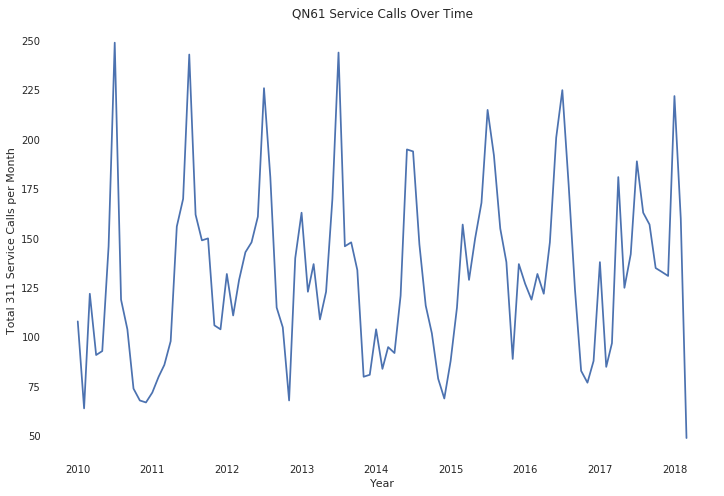

In [150]:
nta_graph_timeline(requests_nta_month_reset, "QN61", "unique_key")

In [43]:
#data_311.head()

In [44]:
nta_map = pd.read_csv("/home/ec2-user/data/requests_labeled.csv")

In [ ]:
requests_with_nta = requests[["unique_key", "created_date", "closed_date", "complaint_type", "resolution_date", "due_date"]].merge(nta_map, on="unique_key", how="inner")

In [46]:
requests_with_nta.head()

,unique_key,created_date,closed_date,complaint_type,resolution_date,due_date,nta_code,datetime
0,28272192,06/16/2014 09:34:00 AM,06/16/2014 12:00:00 PM,Sanitation Condition,06/16/2014 12:00:00 PM,NaN,BK32,2014-06-16
1,28272281,06/16/2014 08:21:00 AM,06/16/2014 12:00:00 PM,Sanitation Condition,06/16/2014 12:00:00 PM,NaN,BK45,2014-06-16
2,28272228,06/16/2014 12:00:00 AM,07/15/2014 12:00:00 AM,Rodent,07/15/2014 12:00:00 AM,07/16/2014 12:13:55 PM,BK31,2014-06-16
3,28272230,06/16/2014 12:00:00 AM,04/28/2014 12:00:00 AM,Rodent,04/28/2014 12:00:00 AM,07/16/2014 11:05:03 PM,MN27,2014-06-16
4,28272232,06/16/2014 06:59:00 AM,06/18/2014 12:00:00 PM,Sanitation Condition,06/18/2014 12:00:00 PM,NaN,BK78,2014-06-16


In [ ]:
def nta_